# Amazone크롤러로 가져온 리뷰를 텍스트 분석, 시각화

In [156]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random
from wordcloud import WordCloud, STOPWORDS
from collections import Counter


In [157]:
import nltk
from nltk import pos_tag

In [158]:
import pickle

In [159]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [160]:
with open("amazon_review_data.pkl", "rb") as f: data = pickle.load(f)

In [161]:
data

{'평점': ['2.0',
  '5.0',
  '3.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '3.0',
  '5.0',
  '5.0',
  '5.0',
  '3.0',
  '3.0',
  '5.0',
  '3.0',
  '5.0',
  '5.0',
  '5.0',
  '1.0',
  '5.0',
  '3.0',
  '1.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '3.0',
  '5.0',
  '1.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '1.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '4.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '1.0',
  '1.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '2.0',
  '5.0',
  '5.0',
  '5.0',
  '3.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '1.0',
  '5.0',
  '5.0',
  '5.0',
  '2.0',
  '5.0',
  '5.0',
  '4.0',
  '5.0',
  '4.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '2.0',
  '2.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0',
  '5.0'],
 '리

In [162]:
stopwords = nltk.corpus.stopwords.words("english")

In [163]:
stopwords = stopwords + ['’']

In [164]:
def delet_word_eglish(string):
    result_words=[]
    split_text = nltk.word_tokenize(string)
    result = nltk.pos_tag(split_text)
    for word, tag in result:
        if tag in["VB", "VBD", "VBG", "VBN", "VBZ", "VBP",
                  "JJ", "JJR", "JJS", "NN", "NNS", "NNP", "NNPS"]:
            if word.lower() not in stopwords:
                result_words.append(word)
                
    return result_words

In [165]:
len(data['리뷰']),len(data['평점'])

(110, 110)

In [166]:
review_list = []
high_list = []
mid_list = []
low_list = []


for i in range(len(data['리뷰'])):
    review =  data['리뷰'][i]
    review_list.append(review)
    score = data['평점'][i]
    if score == ('5.0'or'4.0'):
        high_list.append(review)
    elif score == ('2.0' or '1.0'):
        low_list.append(review)
    else:
        mid_list.append(review)
            
     

In [167]:
len(review_list),len(high_list), len(mid_list), len(low_list)

(110, 87, 18, 5)

In [168]:
text = ''.join(review_list)

In [169]:
final = delet_word_eglish(text)
count = Counter(final)
print(count.most_common(30))

[('skin', 55), ('product', 47), ('face', 32), ('use', 28), ('aloe', 27), ('using', 20), ('used', 15), ('good', 15), ('scent', 13), ('gel', 11), ('feel', 10), ('dry', 10), ('feels', 10), ('sensitive', 10), ('little', 9), ("'s", 9), ('get', 9), ('great', 9), ('products', 9), ('day', 9), ('%', 9), ('Vera', 9), ('hair', 9), ('nice', 8), ('vera', 8), ('apply', 8), ('love', 8), ('time', 8), ('soft', 8), ('Aloe', 7)]


In [170]:
wordcloud = WordCloud(font_path = r"C:\Windows\Fonts\batang.ttc", 
                      width = 700, 
                      height = 700, 
                      background_color = 'black', 
                      colormap = 'spring',
                      random_state = 1).generate_from_frequencies(count)

<function matplotlib.pyplot.show(close=None, block=None)>

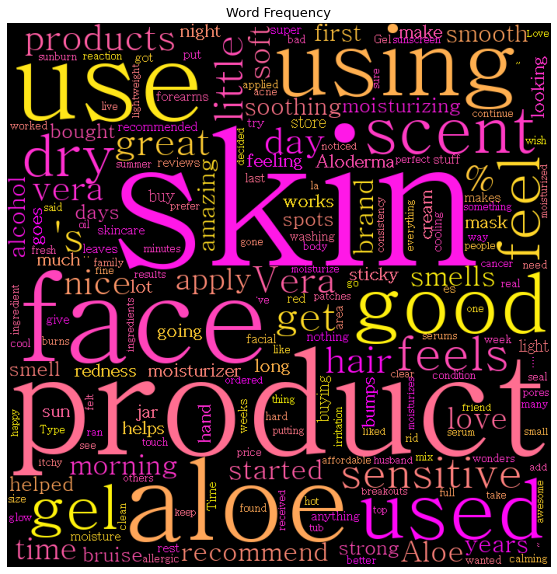

In [171]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size = 13)
plt.show

In [172]:
high = ''.join(high_list)
mid = ''.join(mid_list)
low = ''.join(low_list)

<function matplotlib.pyplot.show(close=None, block=None)>

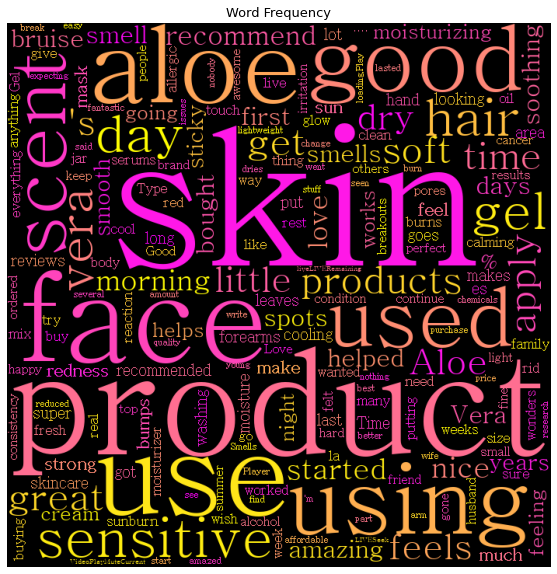

In [173]:
hiscr = delet_word_eglish(high)
counth = Counter(hiscr)

wordcloud = WordCloud(font_path = r"C:\Windows\Fonts\batang.ttc", 
                      width = 700, 
                      height = 700, 
                      background_color = 'black', 
                      colormap = 'spring',
                      random_state = 1).generate_from_frequencies(counth)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size = 13)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

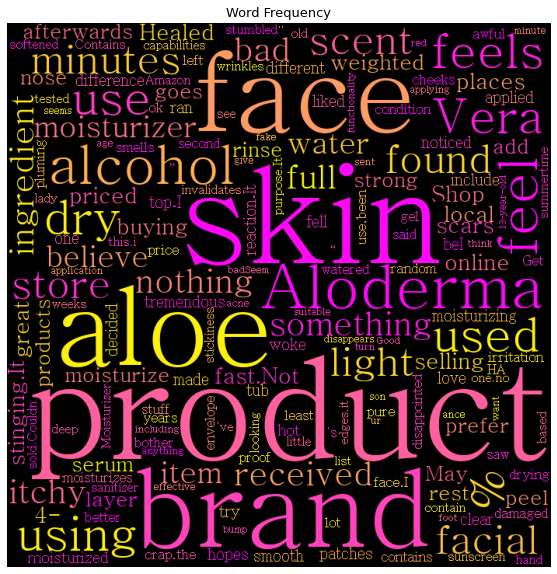

In [174]:
midscr = delet_word_eglish(mid)
countm = Counter(midscr)

wordcloud = WordCloud(font_path = r"C:\Windows\Fonts\batang.ttc", 
                      width = 700, 
                      height = 700, 
                      background_color = 'black', 
                      colormap = 'spring',
                      random_state = 1).generate_from_frequencies(countm)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size = 13)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

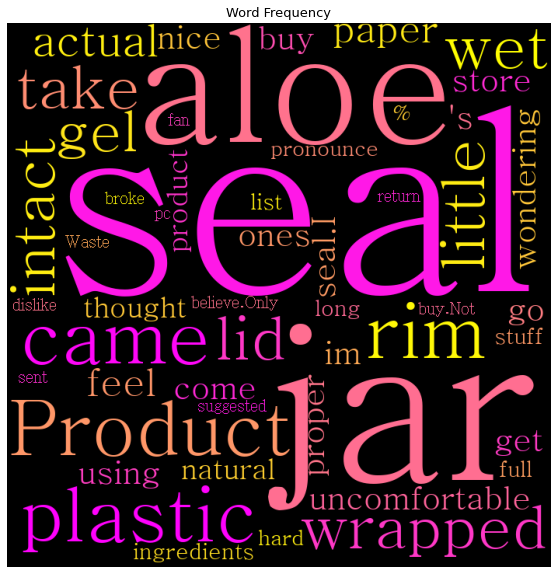

In [175]:
lowscr = delet_word_eglish(low)
countL = Counter(lowscr)

wordcloud = WordCloud(font_path = r"C:\Windows\Fonts\batang.ttc", 
                      width = 700, 
                      height = 700, 
                      background_color = 'black', 
                      colormap = 'spring',
                      random_state = 1).generate_from_frequencies(countL)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size = 13)
plt.show
